<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_violinplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [13]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###[violinplot](https://en.wikipedia.org/wiki/Violin_plot) - 위키백과
- 숫자데이터를 플로팅하는 방법
- 상자 수염 그림(boxplot)과 유사함
- 각 면에 회전된 커널밀도플롯(kdeplot)이 추가됨
- 양적 데이터의 분포를 볼 수 있음

###swarmplot 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)
- planets
 - method(object) : 방법
 - number(int64) : 숫자
 - oribital_period(float64) : 궤도주기
 - mass(float64) : 질량
 - distance(float64) : 거리
 - year(int64) : 년

####tips

In [3]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [4]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


####planets

In [27]:
#데이터 로드하기
planets = sns.load_dataset('planets')

In [28]:
#데이터 정보
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [29]:
#데이터 수치적 요약
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [30]:
#데이터 범주적 요약
planets.describe(include='object')

,method
count,1035
unique,10
top,Radial Velocity
freq,553


####그래프 확인

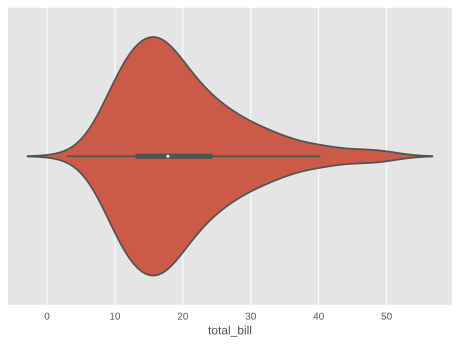

In [31]:
sns.violinplot(x=tips['total_bill'])

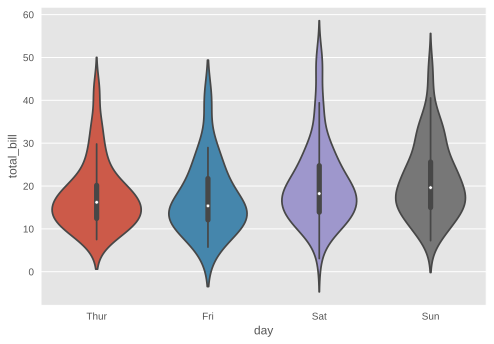

In [15]:
#x축에는 day(범주)컬럼, y축에는 total_bill(숫자) 컬럼
sns.violinplot(x='day', y='total_bill', data=tips)

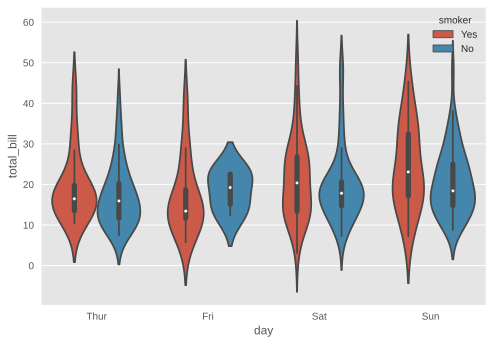

In [16]:
#hue 옵션 사용
#smoker 컬럼을 다른색상으로 표현
sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker')

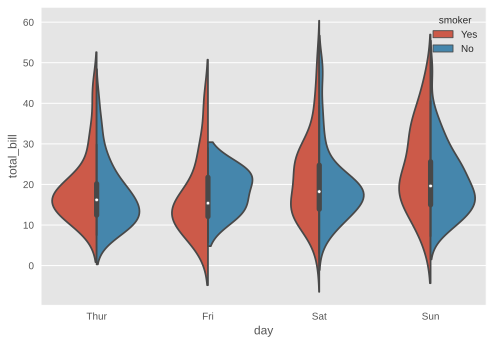

In [17]:
#split=True 옵션 사용
#서로 떨어진 플롯을 하나의 플롯으로 만듬
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split=True)

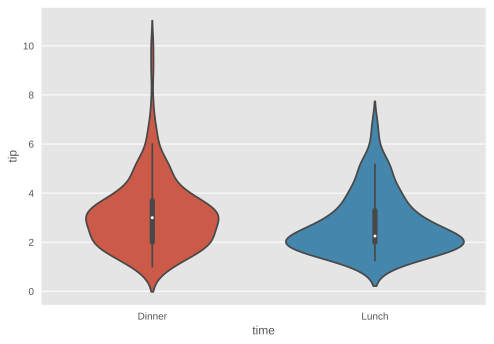

In [18]:
#order옵션 사용
#order 옵션에 할당된 순서로 그래프에 표현
sns.violinplot(x='time', y='tip', data=tips, order=['Dinner','Lunch'])

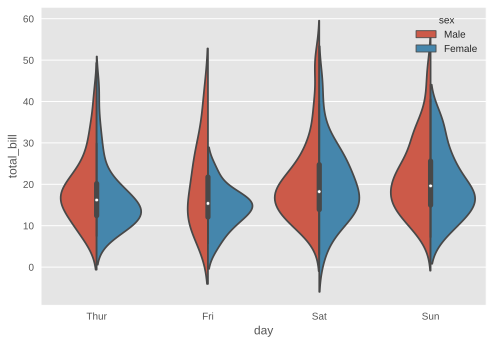

In [19]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)

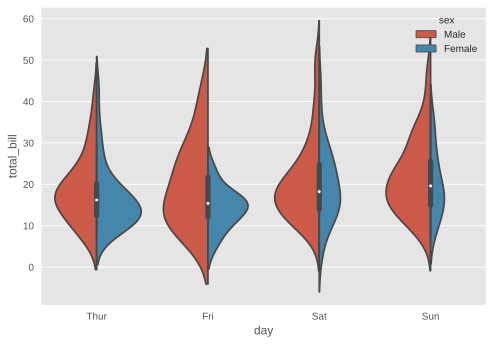

In [20]:
#scale='count' 옵션 사용
#각 빈의 관찰 수 에 따라 그래프의 너비를 조정

sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, scale='count')

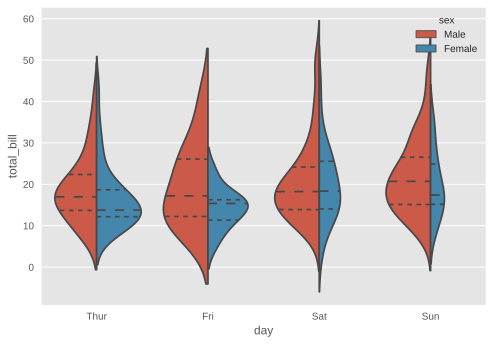

In [21]:
#inner='quartile' 옵션사용
#inner에 미니박스 대신 가로 선으로 사분위 수를 표현
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, scale='count',inner='quartile')

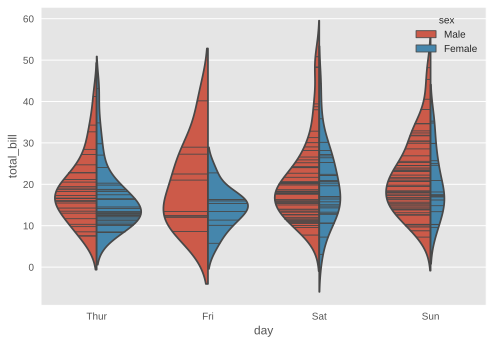

In [22]:
#inner='stick'옵션 사용
#inner에 각 관찰 내용을 stick으로 표현
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, scale='count', inner='stick')

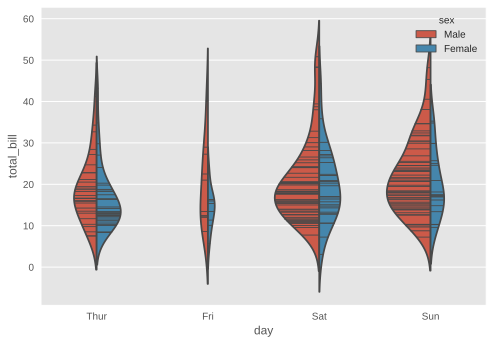

In [24]:
#scale_hue = False 옵션 사용
#모든 빈의 개수를 기준으로 밀도를 조정
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, scale='count', inner='stick', scale_hue=False)

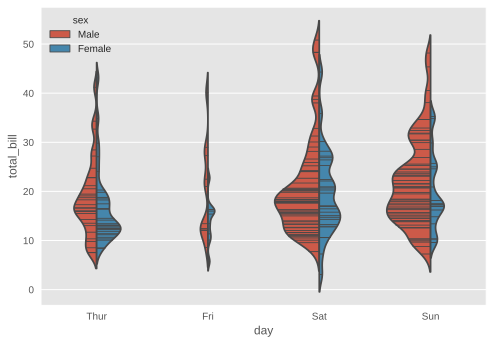

In [25]:
#좁은 대역폭을 사용하여 스무딩한 정도를 줄이기
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True, scale='count', inner='stick',scale_hue=False, bw=.2)

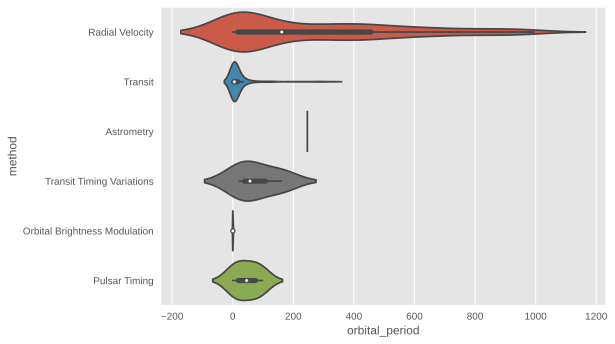

In [32]:
sns.violinplot(x='orbital_period', y='method', 
               data=planets[planets.orbital_period < 1000],
               scale='width')

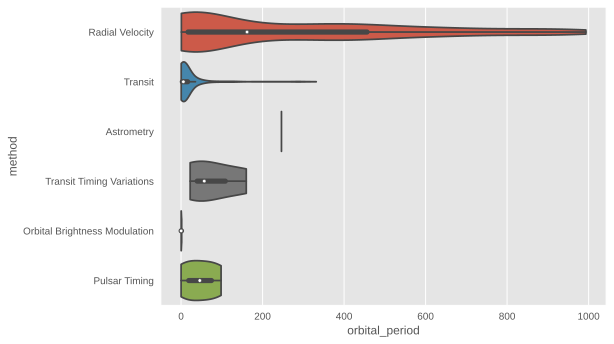

In [33]:
#cut=0 옵션 사용
#그래프가 극단적인 값을 넘어 확장되지 않도록
sns.violinplot(x='orbital_period', y='method',
               data=planets[planets.orbital_period < 1000],
               cut=0, scale='width')

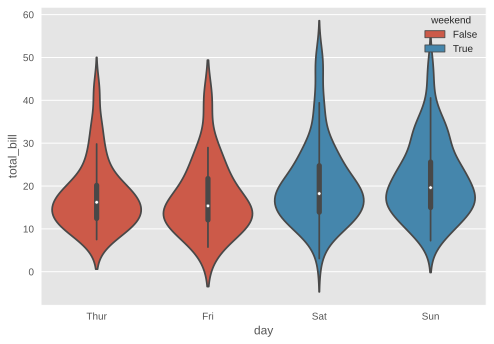

In [35]:
tips['weekend'] = tips['day'].isin(['Sat','Sun'])
sns.violinplot(x='day', y='total_bill', data=tips, hue='weekend', dodge=False)

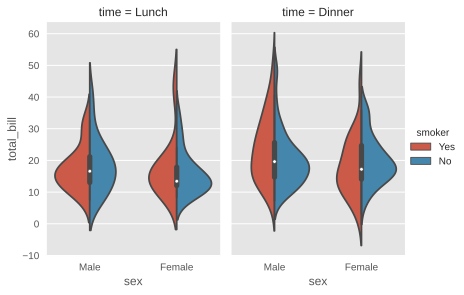

In [37]:
#catplot에서 violinplot 사용하기
#violinplot에는 col 옵션이 없기 떄문에 2개 이상의 서브플롯을 그리지 못함
sns.catplot(x='sex', y='total_bill', hue='smoker', col='time', data=tips,
            split=True, kind='violin', 
            height=4, aspect=.7)